In [121]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import seaborn as sns
from datetime import datetime

In [122]:
lcd= pd.read_csv("D:\\01_Reva\\PDGM\\11_Financial_Analytics\\Data\\Loan Status data.csv")

C:\Users\ashus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
variables_to_drop = ['id','member_id','url','desc','next_pymnt_d','annual_inc_joint','dti_joint','open_acc_6m',
                     'verification_status_joint','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il',
                     'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','revol_bal_joint',
                     'sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc',
                     'sec_app_revol_util','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths',
                     'sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog','hardship_type',
                     'hardship_reason','hardship_status','hardship_amount','hardship_start_date','payment_plan_start_date',
                     'hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest',
                     'hardship_payoff_balance_amount','hardship_last_payment_amount','inq_fi','total_cu_tl','inq_last_12m',
                     'sec_app_open_act_il','deferral_term','hardship_end_date','settlement_term','settlement_percentage',
                     'debt_settlement_flag_date','settlement_amount','settlement_status','settlement_date']

In [124]:
lcd = lcd.drop(variables_to_drop,inplace=False,axis=1)
lcd.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       42535 non-null  int64  
 1   funded_amnt                     42535 non-null  int64  
 2   funded_amnt_inv                 42535 non-null  float64
 3   term                            42535 non-null  object 
 4   int_rate                        42535 non-null  object 
 5   installment                     42535 non-null  float64
 6   grade                           42535 non-null  object 
 7   sub_grade                       42535 non-null  object 
 8   emp_title                       39909 non-null  object 
 9   emp_length                      41423 non-null  object 
 10  home_ownership                  42535 non-null  object 
 11  annual_inc                      42531 non-null  float64
 12  verification_status             

In [125]:
#convert interest rate, revol util to numerical
lcd['revol_util']=lcd['revol_util'].str.rstrip('%').astype('float')/100.0
lcd['int_rate']=lcd['int_rate'].str.rstrip('%').astype('float')/100.0
lcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       42535 non-null  int64  
 1   funded_amnt                     42535 non-null  int64  
 2   funded_amnt_inv                 42535 non-null  float64
 3   term                            42535 non-null  object 
 4   int_rate                        42535 non-null  float64
 5   installment                     42535 non-null  float64
 6   grade                           42535 non-null  object 
 7   sub_grade                       42535 non-null  object 
 8   emp_title                       39909 non-null  object 
 9   emp_length                      41423 non-null  object 
 10  home_ownership                  42535 non-null  object 
 11  annual_inc                      42531 non-null  float64
 12  verification_status             

In [126]:
from datetime import datetime
lcd.to_csv("D:\\01_Reva\\PDGM\\11_Financial_Analytics\\Data\\DataLCD_new_Q1_notnull.csv")
#select only categorical variables
lcd_categorical_only=lcd.select_dtypes(include=[np.object])
lcd_categorical_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   term                  42535 non-null  object
 1   grade                 42535 non-null  object
 2   sub_grade             42535 non-null  object
 3   emp_title             39909 non-null  object
 4   emp_length            41423 non-null  object
 5   home_ownership        42535 non-null  object
 6   verification_status   42535 non-null  object
 7   issue_d               42535 non-null  object
 8   loan_status           42535 non-null  object
 9   pymnt_plan            42535 non-null  object
 10  purpose               42535 non-null  object
 11  title                 42522 non-null  object
 12  zip_code              42535 non-null  object
 13  addr_state            42535 non-null  object
 14  earliest_cr_line      42506 non-null  object
 15  initial_list_status   42535 non-null

In [127]:
#select only numerical variables
lcd_numerics_only=lcd.select_dtypes(include=[np.number])
lcd_numerics_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       42535 non-null  int64  
 1   funded_amnt                     42535 non-null  int64  
 2   funded_amnt_inv                 42535 non-null  float64
 3   int_rate                        42535 non-null  float64
 4   installment                     42535 non-null  float64
 5   annual_inc                      42531 non-null  float64
 6   dti                             42535 non-null  float64
 7   delinq_2yrs                     42506 non-null  float64
 8   inq_last_6mths                  42506 non-null  float64
 9   mths_since_last_delinq          15609 non-null  float64
 10  mths_since_last_record          3651 non-null   float64
 11  open_acc                        42506 non-null  float64
 12  pub_rec                         

In [128]:
#Missing value Treatment
lcd_numerics_only1=np.round(lcd_numerics_only.fillna(lcd_numerics_only.mean()),1)
lcd_numerics_only1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       42535 non-null  int64  
 1   funded_amnt                     42535 non-null  int64  
 2   funded_amnt_inv                 42535 non-null  float64
 3   int_rate                        42535 non-null  float64
 4   installment                     42535 non-null  float64
 5   annual_inc                      42535 non-null  float64
 6   dti                             42535 non-null  float64
 7   delinq_2yrs                     42535 non-null  float64
 8   inq_last_6mths                  42535 non-null  float64
 9   mths_since_last_delinq          42535 non-null  float64
 10  mths_since_last_record          42535 non-null  float64
 11  open_acc                        42535 non-null  float64
 12  pub_rec                         

In [129]:
lcd_categorical_only1=lcd_categorical_only.copy(deep=True)
lcd_categorical_only2=lcd_categorical_only.apply(lambda x:x.fillna(x.value_counts().index[0]))
lcd_categorical_only2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   term                  42535 non-null  object
 1   grade                 42535 non-null  object
 2   sub_grade             42535 non-null  object
 3   emp_title             42535 non-null  object
 4   emp_length            42535 non-null  object
 5   home_ownership        42535 non-null  object
 6   verification_status   42535 non-null  object
 7   issue_d               42535 non-null  object
 8   loan_status           42535 non-null  object
 9   pymnt_plan            42535 non-null  object
 10  purpose               42535 non-null  object
 11  title                 42535 non-null  object
 12  zip_code              42535 non-null  object
 13  addr_state            42535 non-null  object
 14  earliest_cr_line      42535 non-null  object
 15  initial_list_status   42535 non-null

In [130]:
#outlier treatment
lcd_numerics_only2 = lcd_numerics_only1.copy(deep=True)
#lcd_categorical_only1 = lcd_categorical_only.copy(deep=True)
lcd_numerics_only1.loan_amnt.quantile(0.01) # 1st percentile
lcd_numerics_only1.loan_amnt.quantile(0.5) # same as median
lcd_numerics_only1.loan_amnt.quantile(0.99) # 99th percentile

1200.0

9700.0

35000.0

In [131]:
lcd_numerics_only1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,42535.000000,42535.000000,0.0,0.0,0.0,0.0
mean,11089.722581,10821.585753,10139.938792,0.122527,322.622856,6.913656e+04,13.372942,0.152481,1.081436,35.006465,...,NaN,NaN,NaN,NaN,0.043776,0.000024,NaN,NaN,NaN,NaN
std,7410.938391,7146.914675,7131.598034,0.041777,208.927099,6.409334e+04,6.726310,0.512233,1.526934,13.580343,...,NaN,NaN,NaN,NaN,0.205515,0.004849,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,0.100000,15.700000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,5200.000000,5000.000000,4950.000000,0.100000,165.550000,4.000000e+04,8.200000,0.000000,0.000000,35.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,9700.000000,9600.000000,8500.000000,0.100000,277.700000,5.900000e+04,13.500000,0.000000,1.000000,35.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14000.000000,0.100000,428.150000,8.250000e+04,18.700000,0.000000,2.000000,35.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,0.200000,1305.200000,6.000000e+06,30.000000,13.000000,33.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [132]:
for col in lcd_numerics_only1.columns:
    percentiles = lcd_numerics_only1[col].quantile([0.01,0.99]).values
    lcd_numerics_only1[col][lcd_numerics_only1[col] <= percentiles[0]] = percentiles[0]
    lcd_numerics_only1[col][lcd_numerics_only1[col] >= percentiles[1]] = percentiles[1]

C:\Users\ashus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [133]:
lcd_categorical_only2.home_ownership.describe()

count     42535
unique        5
top        RENT
freq      20181
Name: home_ownership, dtype: object

In [134]:
lcd_categorical_only2.groupby('home_ownership').size()

home_ownership
MORTGAGE    18959
NONE            8
OTHER         136
OWN          3251
RENT        20181
dtype: int64

In [135]:
# dummy coding
lcd_categorical_only3=lcd_categorical_only2.copy(deep=True)
for col in lcd_categorical_only3.columns:
    lcd_categorical_only3[col]=pd.Categorical(lcd_categorical_only3[col]).codes

In [136]:
lcd_categorical_only3.info()
lcd_categorical_only3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   term                  42535 non-null  int8 
 1   grade                 42535 non-null  int8 
 2   sub_grade             42535 non-null  int8 
 3   emp_title             42535 non-null  int16
 4   emp_length            42535 non-null  int8 
 5   home_ownership        42535 non-null  int8 
 6   verification_status   42535 non-null  int8 
 7   issue_d               42535 non-null  int8 
 8   loan_status           42535 non-null  int8 
 9   pymnt_plan            42535 non-null  int8 
 10  purpose               42535 non-null  int8 
 11  title                 42535 non-null  int16
 12  zip_code              42535 non-null  int16
 13  addr_state            42535 non-null  int8 
 14  earliest_cr_line      42535 non-null  int16
 15  initial_list_status   42535 non-null  int8 
 16  last

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,0,1,6,24628,1,4,2,13,3,0,...,726,3,201,0,46,76,0,0,0,0
1,1,2,13,20173,10,4,1,13,0,0,...,280,10,43,0,5,118,0,0,0,0
2,0,2,14,24628,1,4,0,13,3,0,...,512,14,389,0,64,75,0,0,0,0
3,0,2,10,357,1,4,1,13,3,0,...,763,4,170,0,46,7,0,0,0,0
4,1,1,9,25135,0,4,1,13,3,0,...,812,36,212,0,48,9,0,0,0,0


In [137]:
lcd_numerics_only1.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.981733,0.929779,0.232924,0.931706,0.417657,0.065398,-0.030831,-0.027796,0.013371,...,NaN,NaN,NaN,NaN,-0.035602,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.981733,1.000000,0.947672,0.231530,0.956989,0.413183,0.065091,-0.031625,-0.027471,0.014085,...,NaN,NaN,NaN,NaN,-0.036925,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.929779,0.947672,1.000000,0.234385,0.888945,0.386110,0.071487,-0.042879,-0.068731,0.061444,...,NaN,NaN,NaN,NaN,-0.037858,NaN,NaN,NaN,NaN,NaN
int_rate,0.232924,0.231530,0.234385,1.000000,0.206307,0.079222,0.072919,0.107436,0.129994,-0.017888,...,NaN,NaN,NaN,NaN,0.051085,NaN,NaN,NaN,NaN,NaN
installment,0.931706,0.956989,0.888945,0.206307,1.000000,0.419266,0.056849,-0.017268,-0.008064,0.002770,...,NaN,NaN,NaN,NaN,-0.032804,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
#standardize the data
from sklearn.preprocessing import scale
x_scaled=scale(lcd_numerics_only1)
x_scaled=pd.DataFrame(x_scaled, columns=lcd_numerics_only1.columns)
cols_with_na = []
for i in range(len(x_scaled.columns)):
    if x_scaled[x_scaled.columns[i]].isna().sum() > 0:        
        cols_with_na.append(x_scaled.columns[i])
        
x_scaled.drop(cols_with_na,inplace=True,axis=1)
x_scaled.shape
x_scaled.head()
x_scaled.describe()

C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:158: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
C:\Users\ashus\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:166: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:183: RuntimeWarning: Mean of empty slice
  mean_2 = np.nanmean(Xr, axis=0)
C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical is

(42535, 33)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,-0.822299,-0.815162,-0.725309,-0.539238,-0.775594,-1.091581,2.023586,-0.332754,-0.044052,0.001510,...,-0.228646,-0.157140,-0.575098,0.0,0.0,0.0,0.0,0.0,-0.213481,0.0
1,-1.159766,-1.165102,-1.072869,1.854468,-1.280205,-0.940694,-1.847319,-0.332754,2.843165,0.001510,...,0.186194,-0.129553,-0.587531,0.0,0.0,0.0,0.0,0.0,-0.213481,0.0
2,-1.173264,-1.179099,-1.086911,1.854468,-1.160293,-1.333000,-0.696510,-0.332754,0.677753,0.001510,...,-0.228646,-0.157140,-0.460521,0.0,0.0,0.0,0.0,0.0,-0.213481,0.0
3,-0.147367,-0.115283,-0.019659,-0.539238,0.087776,-0.457855,0.992341,-0.332754,-0.044052,0.001510,...,-0.228646,-0.157140,-0.530566,0.0,0.0,0.0,0.0,0.0,-0.213481,0.0
4,-1.092272,-1.095114,-1.002655,-0.539238,-1.241050,0.316699,0.678484,-0.332754,-0.765856,0.223955,...,-0.228646,-0.157140,-0.600083,0.0,0.0,0.0,0.0,0.0,-0.213481,0.0


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,4.253500e+04,...,4.253500e+04,4.253500e+04,4.253500e+04,42535.0,42535.0,42535.0,42535.0,42535.0,4.253500e+04,42535.0
mean,-2.623470e-15,-6.965461e-15,-2.796598e-15,2.630538e-14,1.386783e-15,5.290852e-16,-1.951341e-17,5.494371e-15,-1.144476e-14,-1.089591e-14,...,3.737774e-15,3.940886e-15,-7.965808e-16,0.0,0.0,0.0,0.0,0.0,-2.788315e-15,0.0
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,0.0,0.0,0.0,1.000012e+00,0.0
min,-1.335248e+00,-1.347071e+00,-1.385321e+00,-5.392381e-01,-1.391797e+00,-1.333000e+00,-1.951938e+00,-3.327543e-01,-7.658558e-01,-2.593684e+00,...,-2.286455e-01,-1.571397e-01,-6.148871e-01,0.0,0.0,0.0,0.0,0.0,-2.134809e-01,0.0
25%,-7.953022e-01,-8.151623e-01,-7.288201e-01,-5.392381e-01,-7.626237e-01,-6.892151e-01,-7.712375e-01,-3.327543e-01,-7.658558e-01,1.509639e-03,...,-2.286455e-01,-1.571397e-01,-5.656476e-01,0.0,0.0,0.0,0.0,0.0,-2.134809e-01,0.0
50%,-1.878631e-01,-1.712734e-01,-2.303007e-01,-5.392381e-01,-2.137184e-01,-2.114059e-01,2.087813e-02,-3.327543e-01,-4.405152e-02,1.509639e-03,...,-2.286455e-01,-1.571397e-01,-4.896265e-01,0.0,0.0,0.0,0.0,0.0,-2.134809e-01,0.0
75%,5.275652e-01,5.845962e-01,5.420531e-01,-5.392381e-01,5.226420e-01,3.795687e-01,7.980482e-01,-3.327543e-01,6.777527e-01,1.509639e-03,...,-2.286455e-01,-1.571397e-01,1.432165e-01,0.0,0.0,0.0,0.0,0.0,-2.134809e-01,0.0
max,3.227294e+00,3.384113e+00,3.452423e+00,1.854468e+00,2.956865e+00,4.410669e+00,2.023586e+00,4.480776e+00,4.286774e+00,3.189890e+00,...,7.270516e+00,8.312126e+00,4.411519e+00,0.0,0.0,0.0,0.0,0.0,4.684259e+00,0.0


In [139]:
from sklearn.decomposition import PCA

In [140]:
pca=PCA().fit(x_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [142]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [143]:
pca=PCA(20).fit(x_scaled)

In [144]:
#Eigen values
pca.explained_variance_

array([7.82735758, 2.44467059, 2.0758545 , 1.9835486 , 1.59108212,
       1.43328578, 1.08923387, 1.04729009, 0.94014889, 0.79720362,
       0.76251449, 0.55226172, 0.45998185, 0.3973556 , 0.39062807,
       0.35405768, 0.28065015, 0.20009098, 0.12050442, 0.09823802])

In [145]:
lcd_numerics_only1 = lcd_numerics_only1.drop(cols_with_na,axis=1)

In [146]:
#create dataframe of components
pca_lcd_numerics_only1=pd.DataFrame(pca.components_,columns=lcd_numerics_only1.columns)
pca_lcd_numerics_only1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.340185,0.344134,0.337142,0.101820,0.328285,0.175641,0.039400,-0.008704,-0.011729,0.011765,...,0.031338,0.022846,0.178403,0.0,0.0,0.0,0.0,0.0,-0.016474,0.0
1,-0.004438,-0.005517,0.020162,0.105174,-0.010312,-0.013786,0.062286,-0.046664,0.026453,0.129693,...,0.073618,0.064484,-0.023868,0.0,0.0,0.0,0.0,0.0,0.589642,0.0
2,0.020834,0.017503,-0.009250,0.190928,0.017263,0.056859,0.175502,0.096032,0.131311,-0.076475,...,0.578716,0.554997,-0.187383,0.0,0.0,0.0,0.0,0.0,-0.075892,0.0
3,-0.071186,-0.078279,-0.086291,-0.135664,-0.060701,0.225501,0.284328,-0.008269,0.096374,0.033789,...,-0.219869,-0.205982,0.023618,-0.0,-0.0,-0.0,-0.0,-0.0,0.005513,-0.0
4,0.008130,0.006920,-0.026265,0.057005,0.015895,0.097697,-0.188835,0.647899,0.123703,-0.630382,...,-0.053102,-0.045992,0.049364,0.0,0.0,0.0,0.0,0.0,0.137280,0.0
5,0.064068,0.063854,0.061898,-0.408658,0.054140,0.138135,-0.356906,-0.164129,0.020817,0.168968,...,0.241187,0.267003,0.056525,-0.0,-0.0,-0.0,-0.0,-0.0,0.031488,-0.0
6,-0.010298,-0.009880,-0.039171,0.357168,-0.010925,-0.000674,-0.136802,-0.160536,0.776635,0.193423,...,-0.110165,-0.133178,0.070151,0.0,0.0,0.0,0.0,0.0,-0.025173,0.0
7,-0.020913,-0.027895,-0.061256,-0.022986,0.019038,0.609315,-0.506427,-0.068641,-0.030246,0.032720,...,-0.051370,-0.062660,-0.080689,-0.0,-0.0,-0.0,-0.0,-0.0,0.034326,-0.0
8,0.020272,0.024674,0.020303,-0.241332,0.033109,-0.141072,0.151256,-0.010663,-0.217891,-0.004554,...,-0.107814,-0.121110,-0.223418,-0.0,-0.0,-0.0,-0.0,-0.0,0.024146,-0.0
9,0.066940,0.072724,-0.013137,-0.463315,0.122377,-0.106394,0.272474,-0.126973,0.364367,-0.227973,...,0.034768,0.089153,0.400579,0.0,0.0,0.0,0.0,0.0,0.119358,0.0


In [147]:
pca_lcd_numerics_only1.to_csv("D:\\01_Reva\\PDGM\\11_Financial_Analytics\\Data\\pca_lcd_numerics_only1.csv")

In [149]:
pca_lcd_numerics_only2=pca_lcd_numerics_only1.copy(deep=True)

In [151]:
pca_lcd_numerics_only3=pca_lcd_numerics_only1.apply(lambda x:x.abs())

In [152]:
pca_lcd_numerics_only3
pca_lcd_numerics_only3.to_csv("D:\\01_Reva\\PDGM\\11_Financial_Analytics\\Data\\pca_lcd_numerics_only3.csv")

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.340185,0.344134,0.337142,0.101820,0.328285,0.175641,0.039400,0.008704,0.011729,0.011765,...,0.031338,0.022846,0.178403,0.0,0.0,0.0,0.0,0.0,0.016474,0.0
1,0.004438,0.005517,0.020162,0.105174,0.010312,0.013786,0.062286,0.046664,0.026453,0.129693,...,0.073618,0.064484,0.023868,0.0,0.0,0.0,0.0,0.0,0.589642,0.0
2,0.020834,0.017503,0.009250,0.190928,0.017263,0.056859,0.175502,0.096032,0.131311,0.076475,...,0.578716,0.554997,0.187383,0.0,0.0,0.0,0.0,0.0,0.075892,0.0
3,0.071186,0.078279,0.086291,0.135664,0.060701,0.225501,0.284328,0.008269,0.096374,0.033789,...,0.219869,0.205982,0.023618,0.0,0.0,0.0,0.0,0.0,0.005513,0.0
4,0.008130,0.006920,0.026265,0.057005,0.015895,0.097697,0.188835,0.647899,0.123703,0.630382,...,0.053102,0.045992,0.049364,0.0,0.0,0.0,0.0,0.0,0.137280,0.0
5,0.064068,0.063854,0.061898,0.408658,0.054140,0.138135,0.356906,0.164129,0.020817,0.168968,...,0.241187,0.267003,0.056525,0.0,0.0,0.0,0.0,0.0,0.031488,0.0
6,0.010298,0.009880,0.039171,0.357168,0.010925,0.000674,0.136802,0.160536,0.776635,0.193423,...,0.110165,0.133178,0.070151,0.0,0.0,0.0,0.0,0.0,0.025173,0.0
7,0.020913,0.027895,0.061256,0.022986,0.019038,0.609315,0.506427,0.068641,0.030246,0.032720,...,0.051370,0.062660,0.080689,0.0,0.0,0.0,0.0,0.0,0.034326,0.0
8,0.020272,0.024674,0.020303,0.241332,0.033109,0.141072,0.151256,0.010663,0.217891,0.004554,...,0.107814,0.121110,0.223418,0.0,0.0,0.0,0.0,0.0,0.024146,0.0
9,0.066940,0.072724,0.013137,0.463315,0.122377,0.106394,0.272474,0.126973,0.364367,0.227973,...,0.034768,0.089153,0.400579,0.0,0.0,0.0,0.0,0.0,0.119358,0.0


In [153]:
pca1=pd.DataFrame(np.sort(pca_lcd_numerics_only3.values)[:,-2:], columns=['2nd-largest','largest'])
pca1

,2nd-largest,largest
0,0.342548,0.344134
1,0.571621,0.589642
2,0.554997,0.578716
3,0.533277,0.543875
4,0.630382,0.647899
5,0.408658,0.604901
6,0.357168,0.776635
7,0.506427,0.609315
8,0.241332,0.863201
9,0.400579,0.463315


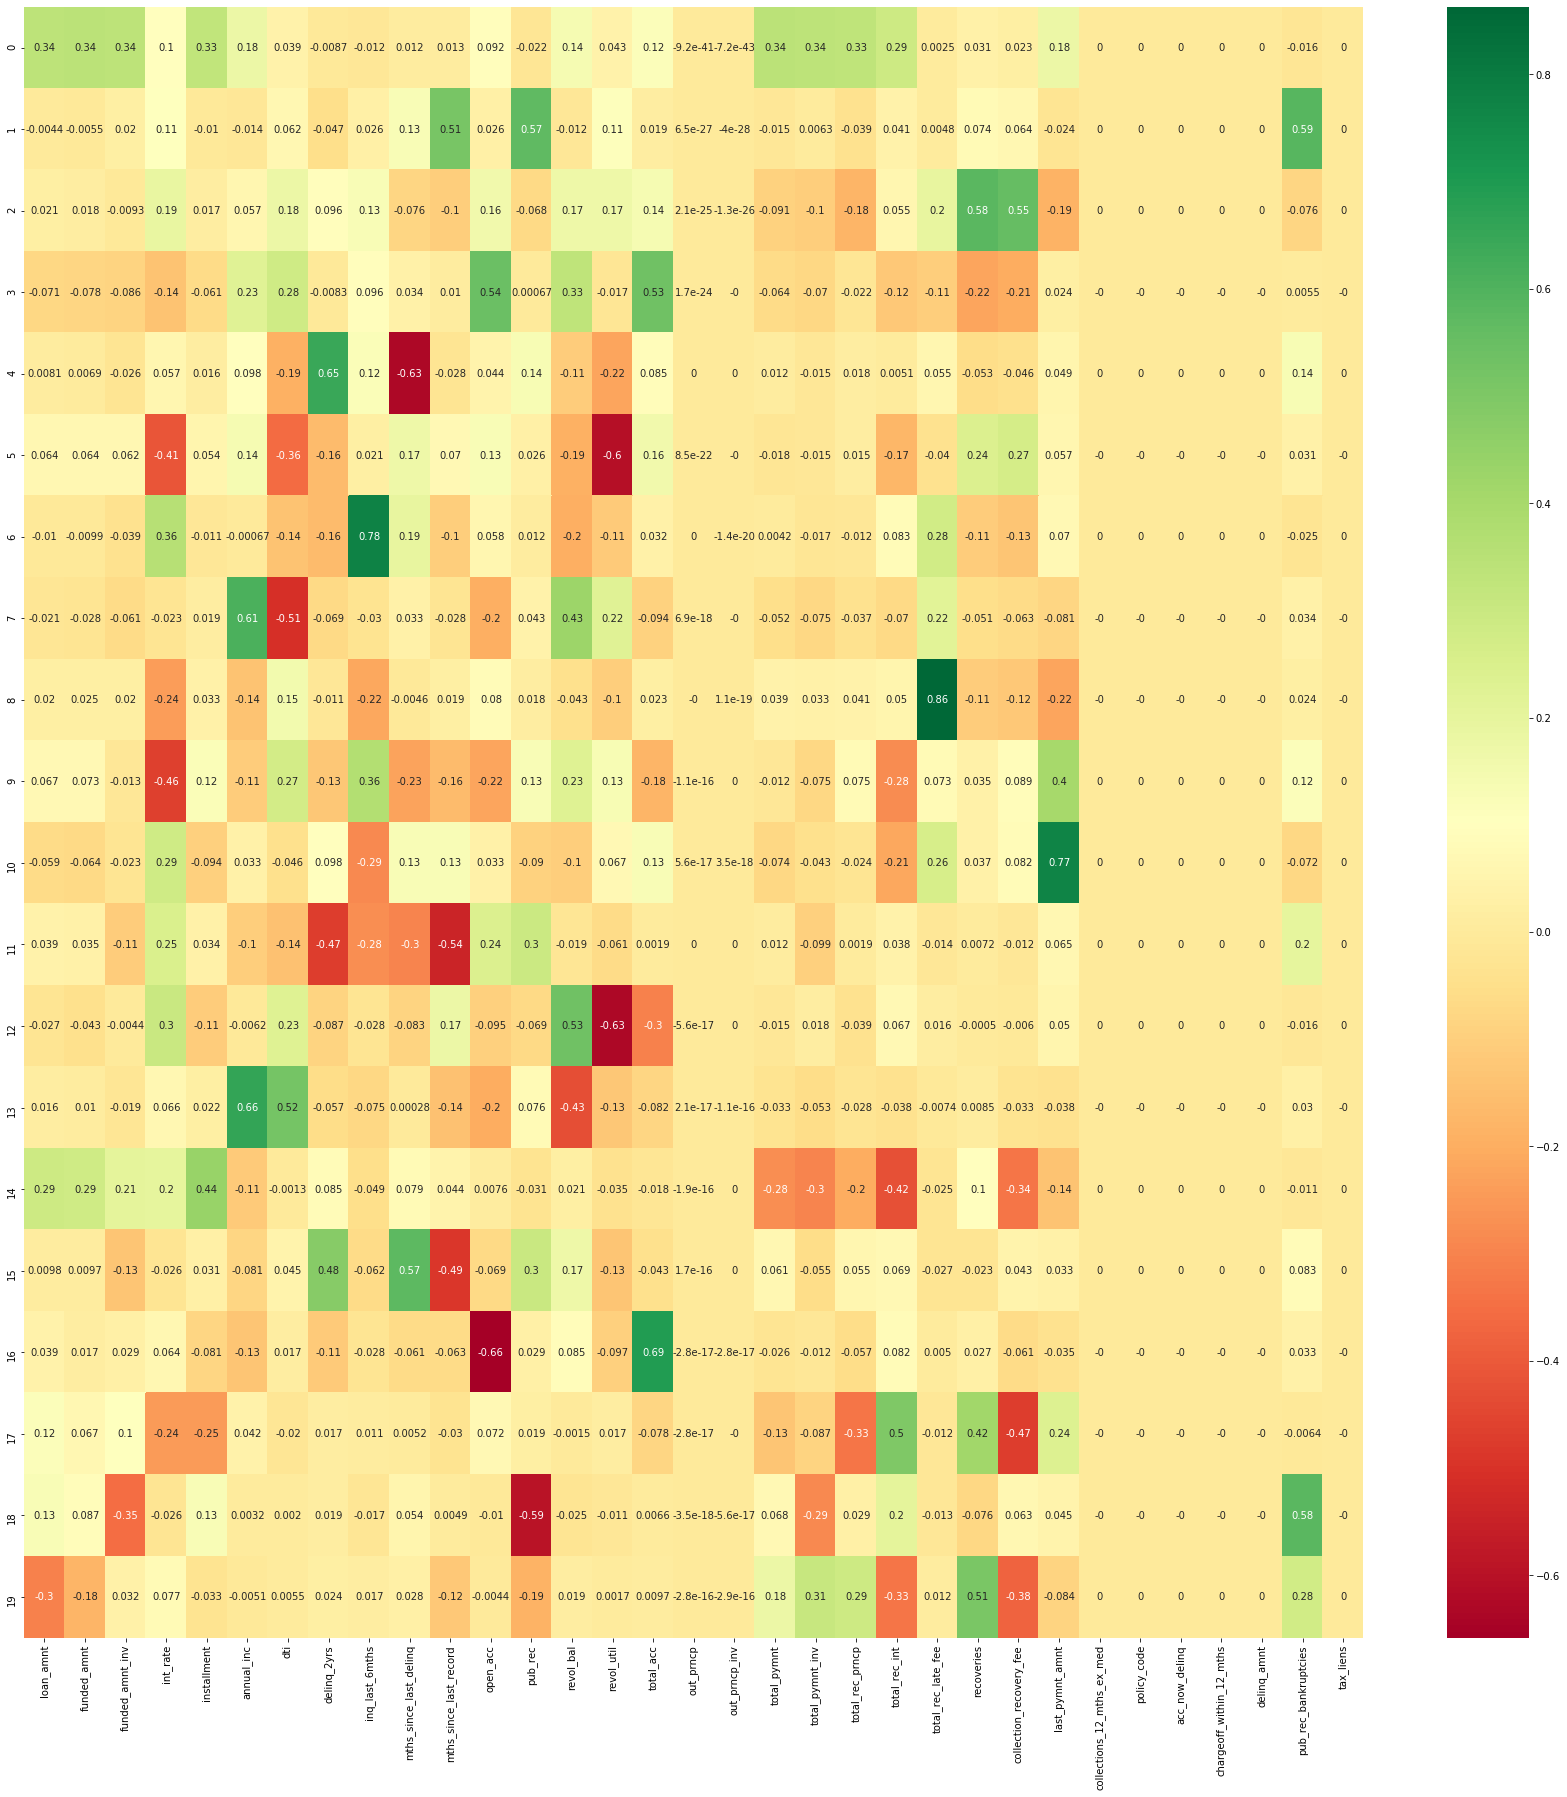

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(pca_lcd_numerics_only1, cmap='RdYlGn',annot=True)
plt.show();

In [155]:
significant_features = ['loan_amnt', 'funded_amnt','delinq_2yrs','mths_since_last_delinq',
                        'pub_rec','collection_recovery_fee','recoveries','pub_rec_bankruptcies',
                        'inq_last_6mths','mths_since_last_record','tax_liens','dti','collections_12_mths_ex_med','int_rate',
                        'total_rec_late_fee']

In [156]:
x=pd.concat((lcd_numerics_only1, lcd['loan_status']), axis=1)
y = x['loan_status']

In [157]:
#delete loan status from x
del x['loan_status']

In [158]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(31901, 33)

(10634, 33)

(31901,)

(10634,)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
log=LogisticRegression()
log.fit(train_x,train_y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Users\ashus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [161]:
log.coef_

array([[ 4.00828107e-04,  1.57324926e-03,  1.22394859e-03,
        -5.41286306e-08, -3.16548019e-06, -1.07956024e-05,
        -4.36640412e-06, -2.71169225e-08, -4.80510356e-06,
        -1.06115107e-05, -1.28417587e-05, -3.15468632e-06,
        -6.54701249e-09, -1.15628337e-05, -3.47315567e-08,
        -5.09515505e-06,  0.00000000e+00,  0.00000000e+00,
        -5.35564789e-04, -6.30056503e-04, -2.10549860e-03,
         1.27399009e-03,  7.40822463e-06,  3.40491583e-04,
         2.89916215e-05, -1.35722521e-03,  0.00000000e+00,
        -4.45124112e-07,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.01843240e-09,  0.00000000e+00],
       [ 4.82421874e-04,  1.53690927e-03,  1.03915062e-03,
        -3.41063456e-08,  7.30928189e-05, -2.47936650e-05,
        -8.89748218e-06, -3.86975235e-08,  4.58614144e-06,
        -2.80161279e-05, -5.25573626e-05, -3.75693503e-06,
         5.35356778e-08,  1.29458704e-05, -2.88534628e-07,
        -7.61784404e-06,  0.00000000e+00,  0.00000000e+

In [164]:
classes=log.predict(test_x)

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score

In [171]:
#precison and recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))
print("Precison/Recall Metrics")
print(metrics.classification_report(test_y, classes))

Accuracy Score
0.9275907466616513
Precison/Recall Metrics
                                                     precision    recall  f1-score   support

                                        Charged Off       0.88      0.95      0.91      1354
Does not meet the credit policy. Status:Charged Off       0.35      0.09      0.14       206
 Does not meet the credit policy. Status:Fully Paid       0.49      0.09      0.15       522
                                         Fully Paid       0.94      0.99      0.97      8552

                                           accuracy                           0.93     10634
                                          macro avg       0.67      0.53      0.54     10634
                                       weighted avg       0.90      0.93      0.91     10634



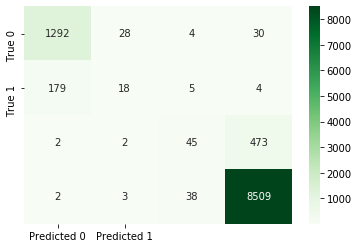

In [168]:
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0", "Predicted 1"]
lbl2=["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();